# Logistic regression

### Setup

In [4]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

np.random.seed(42)

### Let's load our dataset 
Today we wil be using breast cancer dataset

In [5]:
data = load_breast_cancer()

print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

#### Split our data

In [6]:
X, y = load_breast_cancer(return_X_y=True)

### What is validation?
We just simply split our dataset into train set and validation set 
<img src="validation.png"> 


In [7]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, train_size=0.7)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, train_size=0.66)

In [8]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((398, 30), (398,), (112, 30), (112,), (59, 30), (59,))

In [9]:
y_train[0:10]

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [10]:
X[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

### What is logistic regression?
Logistic regression is about applying a "squashing" function to the hypotheses when calculating loss.

<img src="regression.png">

Previously:

### $\hat{y} =h_w(x)$

Now, with "squashing":

### $\hat{y} = \sigma(h_w(x))$

## Why do we need squashing?

One of such squashing functions is sigmoid function:
### $\sigma(x) = \frac{1}{1+e^{-x}}$

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

<IPython.core.display.Javascript object>


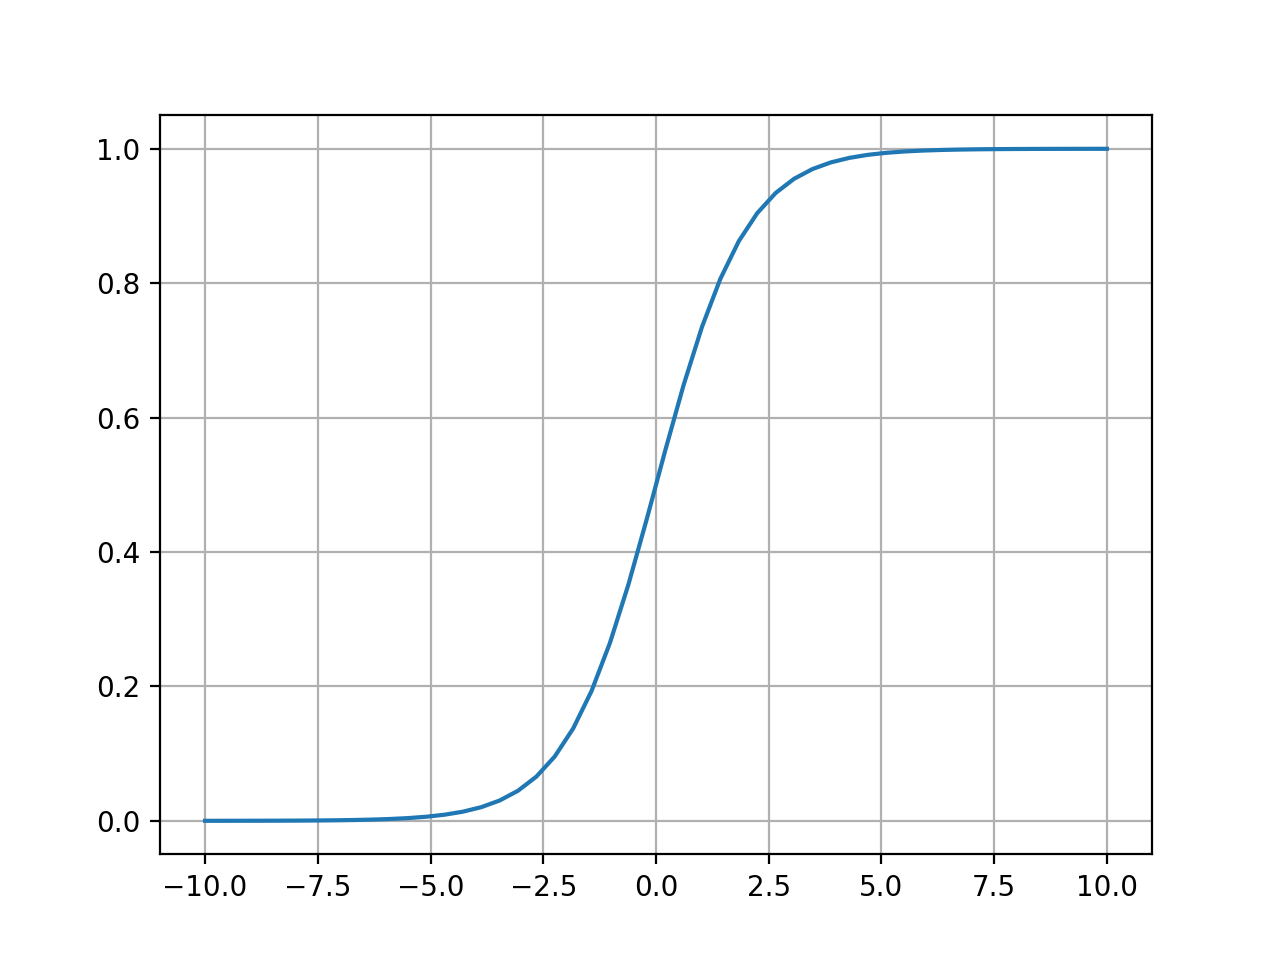

In [9]:
x = np.linspace(-10, 10)
y = sigmoid(x)

plt.plot(x,y)
plt.grid(True)
plt.show()

In [11]:
sigmoid(np.inf), sigmoid(-np.inf)

(1.0, 0.0)

### $h_w(x) = \sum_{j=0}^k w_j x_j = wx$

### $\hat{y} = \sigma(h_w(x))$


In [10]:
def evaluate(W, X):
    result = X @ W
    return sigmoid(result)

### Loss
We'll use a logarythmic loss function which quite nicely captures an intuition, that we want the predictions datapoins which should be predicted as $0$ as close to $0$ as possible, and, analogically, predictions which should be $1$, as close to $1$ as possible:

### $ L(w) = \frac{-1}{n}(\sum_{i=0}^n y^{(i)}\log{h_w(x^{(i)})} + (1-y^{(i)})\log{(1-h_w(x^{(i)}))} )$

### $ where \ y^{(i)} \in \{0, 1\}$

<IPython.core.display.Javascript object>


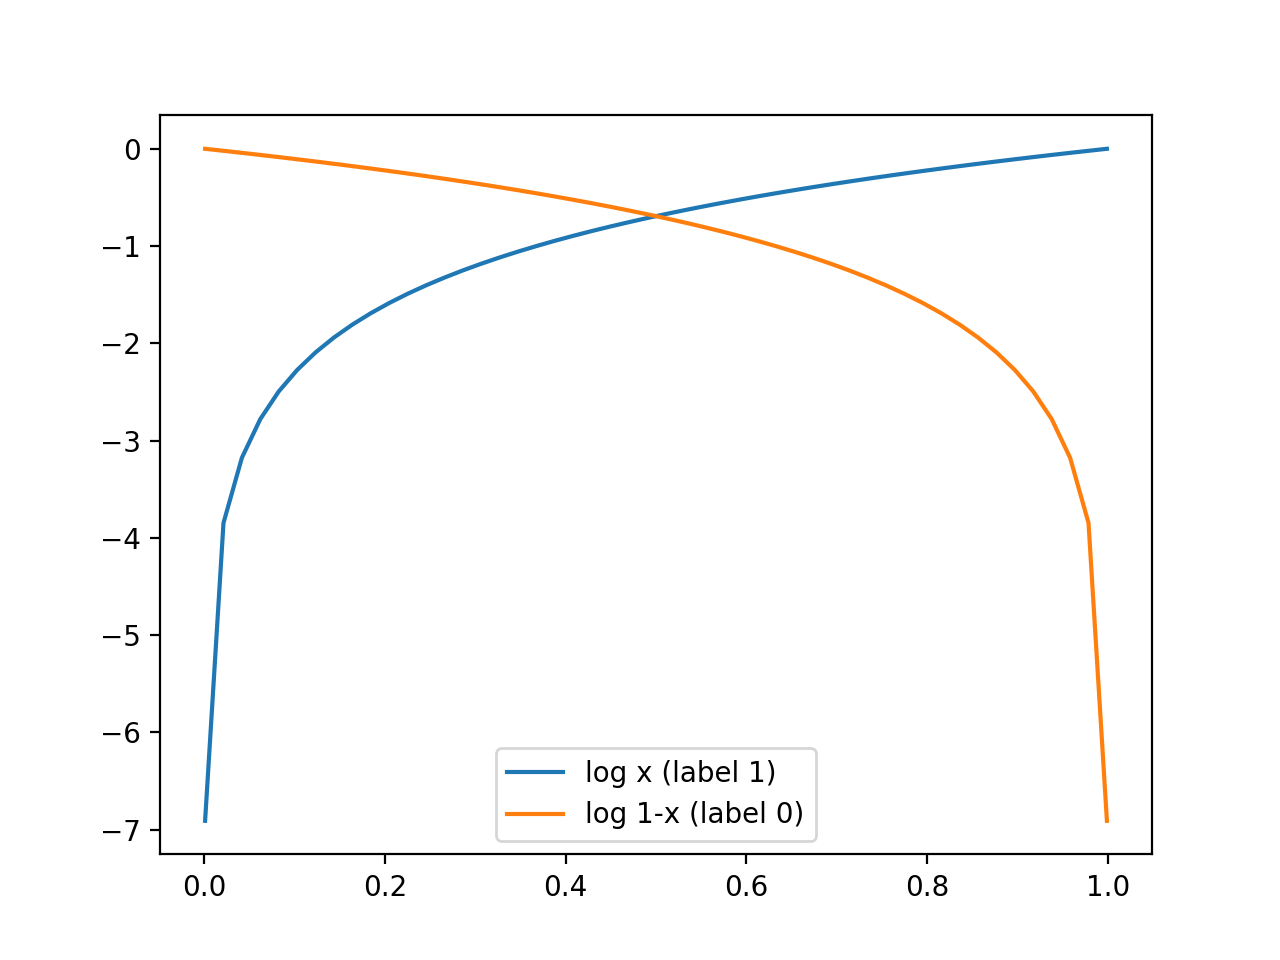

In [28]:
x = np.linspace(0.001, 0.999)

y_1 = np.log(x)
y_2 = np.log(1-x)

plt.plot(x, y_1, label='log x (label 1)')
plt.plot(x, y_2, label='log 1-x (label 0)')
plt.legend()

In [30]:
def loss(W, X, Y, eps):
    y_pred = evaluate(W, X)
    result = Y * np.log(y_pred + eps) + (1 - Y) * np.log(1 - y_pred + eps)
    result = result.mean()
    result *= -1
    return result

### Well-known gradient descent
### $\epsilon_j = \frac{\partial}{\partial w_j}L(W) = \frac{1}{N} \sum_{i=1}^N(h_W(x^{(i)}) - y^{(i)})x_j^{(i)}$

### $w_j = w_j - \mu \epsilon_j$ 

But we do this in vectorized version:

### $W = W - \mu {X^T \cdot (h_w(x) - Y) \over n}$ 

In [12]:
def gradient_step(W, X, Y, lr):
    Y_hat = evaluate(W, X)
    errors = Y_hat - Y
    dW = (X.T @ errors) / len(errors)
    return W - dW * lr

### Bias feature

Previously:

### $\hat{y} = h_W(x) = w_0 + w_1x$ 

And today:

### $\hat{y} = h_W(x_1, x_2, ..., x_k) 
= w_0 + w_1x_1+ w_2x_2+ w_3x_3+ ... + w_kx_k 
= w_0 + \sum_{i=1}^k w_i x_i$ 

As you can see, $w_0$ has been left out from the sum, which makes it sad. Can we do something, which will make it possible to include it there?

The simple solution is to add a *bias feature* to our input dataset - $X$ - i.e. add a column of ones to it.
 
### $x_0 = 1$
and 
### $ x_0 \cdot w_0 = w_0 $

therefore

### $ w_0 + \sum_{i=1}^k w_i x_i =  \sum_{i=0}^k w_i x_i = h_W(x)$



In [13]:
def add_bias_feature(X):
       return np.c_[np.ones(len(X)), X]

In [14]:
X_train = add_bias_feature(X_train)
X_val = add_bias_feature(X_val)
X_test = add_bias_feature(X_test)

## Feature scaling

We want all our features to be roughly in the same range, i.e [-1, 1]. This is called **data normalization**. 

One way to achieve it is **mean normalization**:

### $x_i = \frac{x_i - \mu_i}{max(x_i) - min(x_i)}$

The exception is the bias feature - $x_0$  - since it's always equal to 1 (just like we want i t to be), we don't normalize it!

This time we will use **standarization**

### $Z = \frac{X - \overline{X}}{S}$

where S is **standard deviation** of X


In [15]:
def std_normalization(feature_matrix, means = None, ranges = None):
    means = feature_matrix.mean(axis=0) if means is None else means
    stds = feature_matrix.std(axis=0) if ranges is None else ranges
    # we alter ranges and means vector so that x_0 remains unaffected
    stds[0] = 1
    means[0] = 0
    return (feature_matrix - means) / stds, means, stds

In [16]:
X_train, *norm_parameters = std_normalization(X_train)
X_val, *_ = std_normalization(X_val, *norm_parameters)
X_test, *_ = std_normalization(X_test, *norm_parameters)

In [17]:
X_train[0]

array([ 1.        , -0.12348985, -0.29680142, -0.17050713, -0.20861569,
       -1.2016799 , -0.7731696 , -0.76231194, -0.93324109, -1.22994935,
       -0.94816603, -0.53359339, -0.86028757, -0.61678096, -0.39177533,
       -1.35556152, -0.52503193, -0.4817033 , -0.97940018, -0.88459317,
       -0.68548672, -0.19761978, -0.5067476 , -0.30791001, -0.27357592,
       -1.50742388, -0.44926047, -0.57223884, -0.84082156, -0.8563616 ,
       -0.76574773])

### Now let's train our model!

starting parameters

In [18]:
learning_rate = 0.1
eps = 0.001
train_steps = 100

In [19]:
W = np.random.randn(X_train.shape[1])

train_costs = []
val_costs = []

for _ in range(train_steps):
    train_costs.append(loss(W, X_train, y_train, eps=eps))
    val_costs.append(loss(W, X_val, y_val, eps=eps))
    W = gradient_step(W, X_train, y_train, lr=learning_rate)

<IPython.core.display.Javascript object>


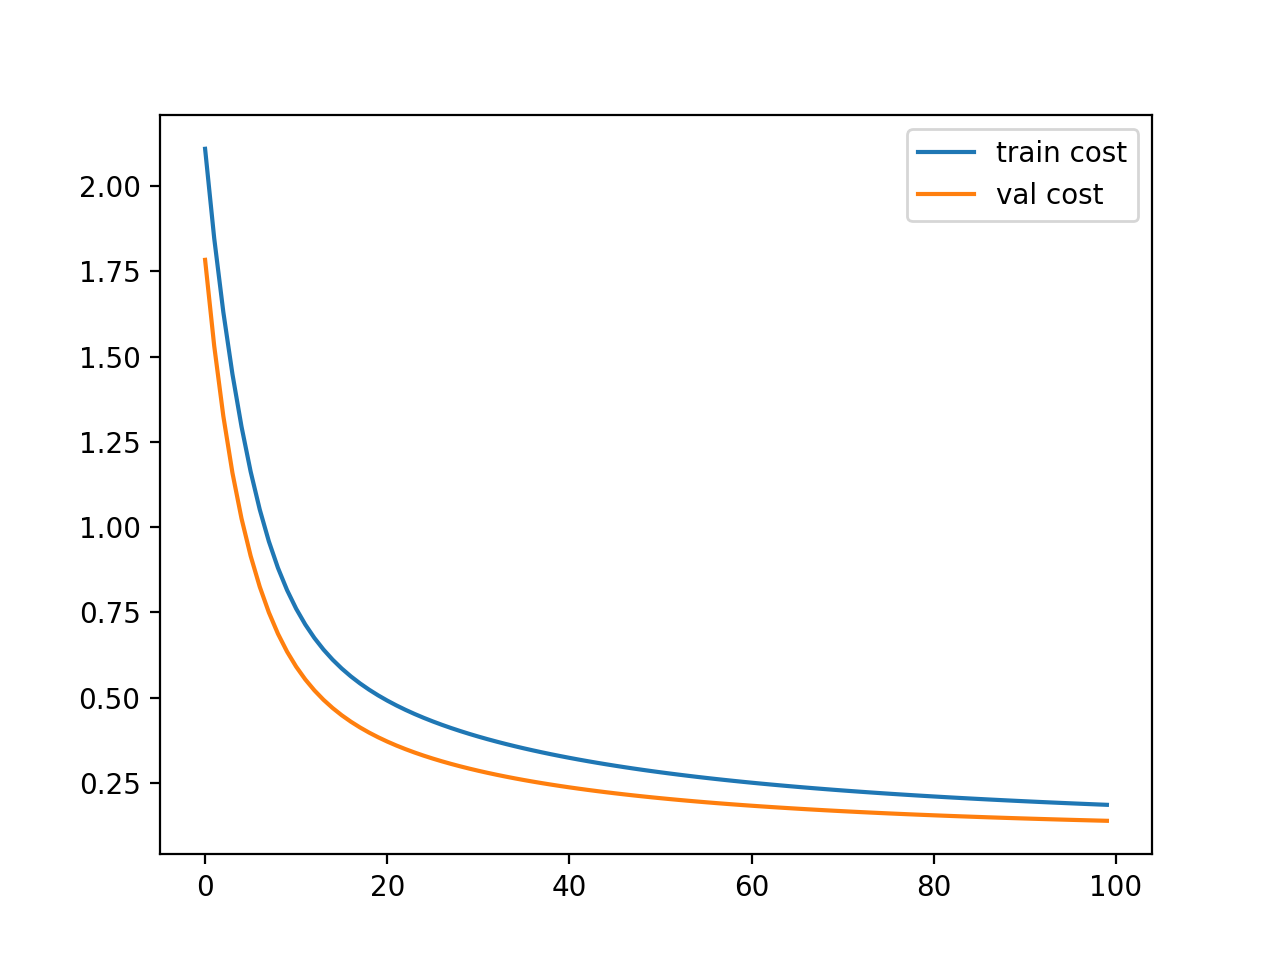

In [20]:
plt.close()

plt.plot(np.arange(train_steps), train_costs)
plt.plot(np.arange(train_steps), val_costs)
plt.legend(["train cost", "val cost"])
plt.show()

<IPython.core.display.Javascript object>


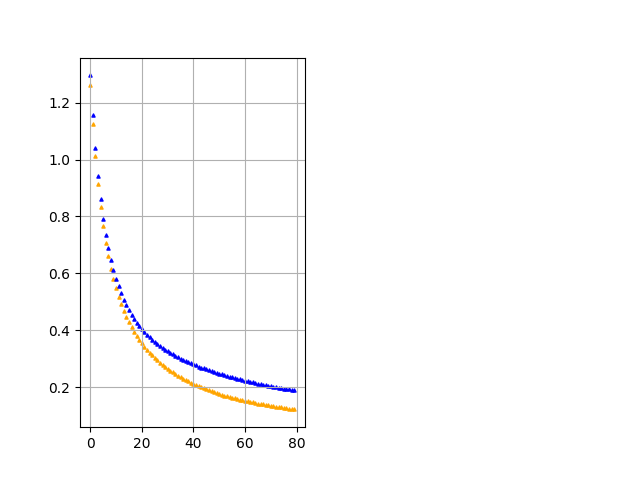

In [23]:

fig = plt.figure()
ax = fig.add_subplot(1,2,1)

def animate(i):
    global W, ax
    if i % 100 == 0:
        ax.clear()
        ax.grid(True)
        W = np.random.randn(X_train.shape[1])
        
    ax.scatter(i%100, loss(W, X_train, y_train, eps=eps), color='blue', marker='^', s=5)
    ax.scatter(i%100, loss(W, X_val, y_val, eps=eps), color='orange', marker='^', s=5)
    W = gradient_step(W, X_train, y_train, lr=learning_rate)
    
FuncAnimation(fig, animate, frames=1000, interval=50, repeat=True, repeat_delay=2000)

In [21]:
positive_ind = np.argwhere(y_val == 1).reshape(-1)
negative_ind = np.argwhere(y_val == 0).reshape(-1)
X_val_pos = X_val[positive_ind]
y_val_pos = y_val[positive_ind]
X_val_neg = X_val[negative_ind]
y_val_neg = y_val[negative_ind]

In [22]:
accuracy_score(y_val_pos, evaluate(W, X_val_pos) >= 0.5)

0.9583333333333334

In [23]:
accuracy_score(y_val_neg, evaluate(W, X_val_neg) >= 0.5)

0.975

We achieve higher accuracies on positive examples, than on negative ones. In practice, this means we're likelier to classify tumors as malignant than not. 

Better safe than sorry? Turns out, not always. Can we dig deeper into the performance of our model?

### Precision and recall
We can divide classifications of our model into four classes:

| Predicted/Actual | 0   | 1   |
|------------------|-----|-----|
| 0                | True negative | False negative|
| 1                | False positive | True positive | 

<img src="precision.png">

**Accuracy - a first intuition**

### $
Accuracy = \frac{T_p + T_n}{T_n + T_p + F_n + F_p}
$

However, as we've just seen, this metric may be deceiving (consider class imbalance!)

Turns out there is a more reliable way to measure the performance of our model:

- **Precision** - *what fraction of our positive classifications is correct?*
### $
Precision = \frac{T_p}{T_p + F_p}
$

- **Recall** - *what fraction of actual positive examples has been classified correctly?*
### $
Recall = \frac{T_p}{T_p + F_n}
$

We want both of those values to be as high as possible.

However, sometimes we have to make a trade off between them and decide with our classification method that one will be higher and the other lower.

A metric which nicely mixes the two above is called the **F1 score** - it's high when both precision and recall are high enough, but low when one of them is sacrificed for the sake of another.

### $
F1 = \frac{2PR}{P +R}
$

#### Can precision and recall be manipulated without tinkering with the model?

<IPython.core.display.Javascript object>


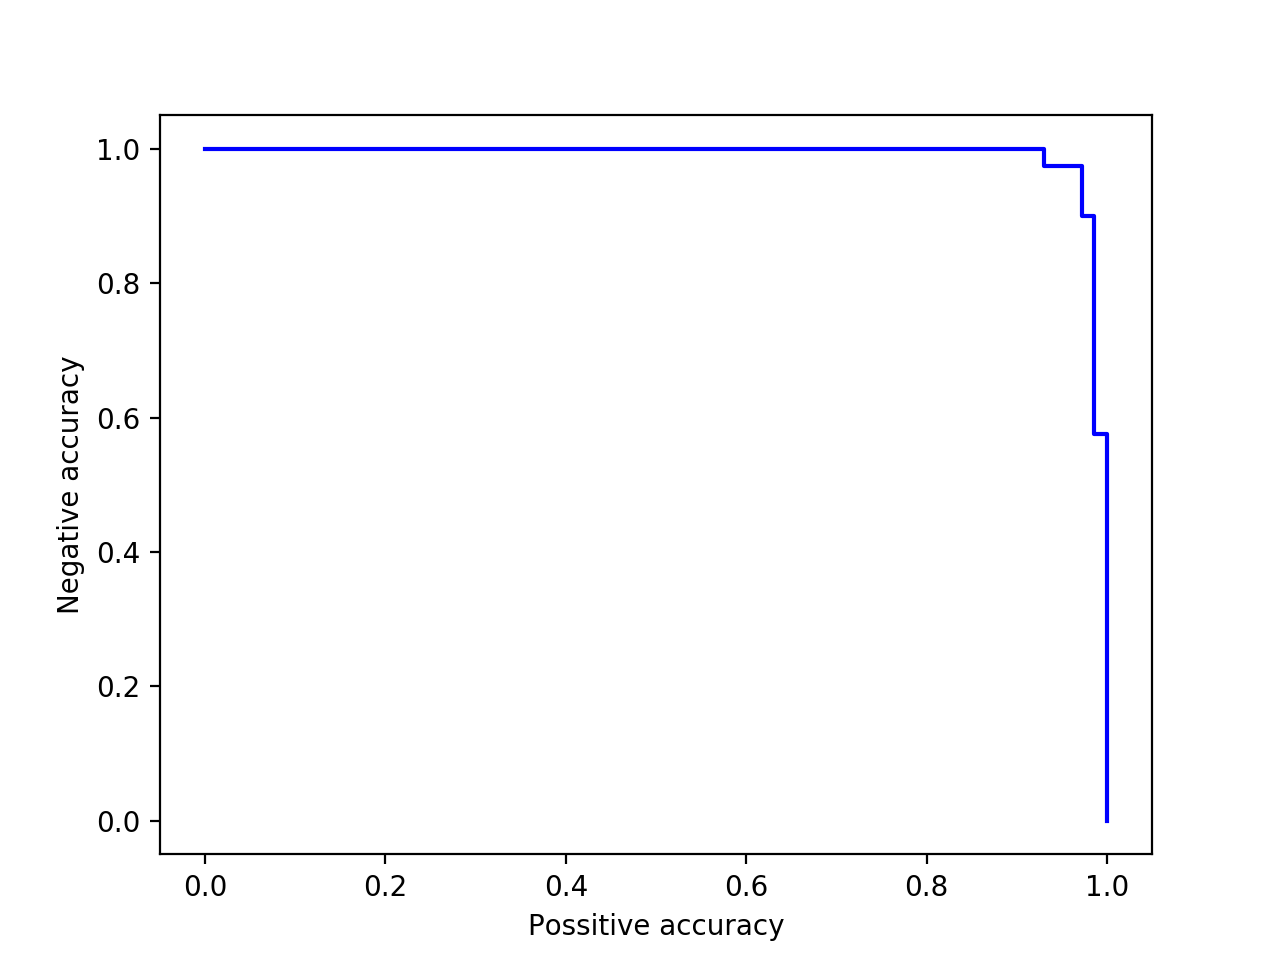

Text(0, 0.5, 'Negative accuracy')

In [24]:
def get_accuracy_pos(X, y, W, threshold):
    y_pred = evaluate(W, X)
    y_pred_bin = y_pred >= threshold
    positive_ind = np.argwhere(y == 1).reshape(-1)
    y_pos = y[positive_ind]
    y_pos_pred = y_pred_bin[positive_ind]
    return accuracy_score(y_pos, y_pos_pred), 

def get_accuracy_neg(X, y, W, threshold):
    y_pred = evaluate(W, X)
    y_pred_bin = y_pred >= threshold
    negative_ind = np.argwhere(y == 0).reshape(-1)
    y_neg = y[negative_ind]
    y_neg_pred = y_pred_bin[negative_ind]
    return accuracy_score(y_neg, y_neg_pred)

thresholds = np.linspace(0,1, 1000)

plt.close()

P = []
N = []

for th in thresholds:
    p, n = get_accuracy_pos(X_val, y_val, W, th), get_accuracy_neg(X_val, y_val, W, th)
    P.append(p)
    N.append(n)
    
plt.plot(P, N, color='blue')
plt.xlabel('Possitive accuracy')
plt.ylabel('Negative accuracy')